In [1]:
#@title Imports
import numpy as np, pandas as pd, matplotlib.pyplot as plt, matplotlib as mpl
import tjy_udf as tjy
print("tjy_udf: ", list(filter(lambda x: '__' not in x, dir(tjy)))) # Print contained functions
mpl.rc_file('tjy.mplstyle')

pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', None)
DISPLAY_SORTED = True
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
from matplotlib import ticker
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator, FormatStrFormatter)
from matplotlib import animation, rc
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# GIT = 'https://github.com/tyokokur/findat/raw/main/sysg/'
GIT = 'https://raw.githubusercontent.com/tyokokur/findat/main/sysg/'

###COOLWARM COLORMAP DOCUMENTATION  
#https://depts.washington.edu/airqual/coolwarm.m
#Base blue: RGB = [59 76 192]
#Base red:  RGB = [180 4 38]
warm_red = [180/255, 4/255, 38/255]
cool_blue = [59/255,76/255,192/255]
mix_purp = np.divide(np.add(warm_red,cool_blue),2).tolist()

tjy_udf:  ['H_find', 'Kap_D', 'git_sync', 'lighten_color', 'plot_anim', 'plot_pha', 'plot_pha_feed', 'ticks']


In [2]:
def find_d_df(A): 
  ps = A.index
  fils = [None]*len(ps)
  for j in range(len(ps)):
    fil = [ind for ind, i in enumerate(A.loc[ps[j]]['Conf']) if i.find('d')!=-1]
    fils[j] = fil
  return fils

In [3]:
def F_add(A):  return A[1] - (125-A[0]) *2*10*1e-03 *6.022e23*1e3*1e-9**3
def F_add_df(A): 
  ps = A.index
  for j in range(len(ps)):
    B = [F_add( [A.loc[ps[j]]['Lx'][i], A.loc[ps[j]]['F'][i]] ) for i in range(len(A.loc[ps[j]]['Lx']))]
    A.loc[ps[j]]['F'] = B
  return A

In [4]:
p1a0s02 = ([67.55, 61.88, 55.42, 48.05, 44.43, 41.25, 
            38.31, 35.81, 33.77, 32.19, 30.83, 29.47, 28.45, 27.54,
            26.86, 26.18, 25.50, 25.16, 24.59, 24.14, 23.69, 23.35,
            23.01, 22.78, 22.44, 22.21, 21.99, 21.76, 21.65, 21.42], 
            [0.4, 0.5, 0.6, 0.7, 0.75, 0.80, 
             0.85, 0.90, 0.95, 1.00, 1.05, 1.10, 1.15, 1.20,
            1.25, 1.30, 1.35, 1.40, 1.45, 1.50, 1.55, 1.60, 
            1.65, 1.70, 1.75, 1.80, 1.85, 1.90, 1.95, 2.00], 
           ['1C'] * 9)
#######
p1a1s02 = ([71.97, 66.87, 61.09, 54.29], [0.40, 0.50, 0.60, 0.70], ['1C']*4)
#######
p1a2s02 = ([81.49, 79.33, 77.29, 75.14, 72.87, 70.49, 67.89, 65.05, 61.88,
            58.37, 54.06, 49.19, 44.88,
            40.35, 37.17, 34.34, 32.30, 
            30.60, 29.35, 28.22, 27.31, 26.52, 25.84, 25.16, 24.71, 
            24.25, 23.80, 23.46, 23.12, 22.78, 22.55, 22.33, 22.10], 
           [0.40, 0.45, 0.50, 0.55, 0.60, 0.65, 0.70, 0.75, 0.80,
            0.85, 0.90, 0.95, 1.00, 
            1.05, 1.10, 1.15, 1.20, 
            1.25, 1.30, 1.35, 1.40, 1.45, 1.50, 1.55, 1.60,
            1.65, 1.70, 1.75, 1.80, 1.85, 1.90, 1.95, 2.00], ['1C'] * 10)
#######
p0a3s02 = ([92.14, 90.67, 89.08, 87.49, 85.79, 83.98, 82.17, 80.13, 77.97, 75.71, 73.33, 71.51, 70.61, 69.47, 68.91, 67.66, 63.81, 59.39, 54.29],
            [0.40, 0.45, 0.50, 0.55, 0.60, 0.65, 0.70, 0.75, 0.80, 0.85, 0.90, 0.94, 0.95, 0.97, 0.98, 1.00, 1.05, 1.10, 1.15],
           ['0C'])
p1a3s02 = ([50.55, 44.43, 38.53, 34.23, 31.51, 29.69, 28.33, 27.20, 26.41, 25.61, 25.16, 24.48,
            24.03, 23.69, 23.23, 22.89, 22.67], 
           [1.20, 1.25, 1.30, 1.35, 1.40, 1.45, 1.50, 1.55, 1.60, 1.65, 1.70, 1.75,
            1.80, 1.85, 1.90, 1.95, 2.00], ['1C'])
p2a3s02 = ([70.61, 67.55, 63.81, 59.39, 54.29, 48.62, 43.18, 39.10, 36.38,
            34.57, 33.09, 31.96, 31.05], 
           [0.95, 1.00, 1.05, 1.10, 1.15, 1.20, 1.25, 1.30, 1.35,
           1.40, 1.45, 1.50, 1.55], 
           ['1C']*14)
p3a3s02 = ([59.39, 54.29, 48.28, 43.18, 39.10, 38.53, 36.38, 36.61, 31.96, 31.05, 30.26],
           [1.10, 1.15, 1.20, 1.25, 1.30, 1.35, 1.40, 1.45, 1.50, 1.55, 1.60],
           ['3C']*9)
#######
p0a4s02 = ([103.1, 102.0, 100.8, 99.51, 98.15, 96.79, 95.43, 93.95, 92.37, 90.78, 89.08, 87.27, 85.34, 83.19, 81.83, 80.92, 80.47, 80.01, 79.45],
           [0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.80, 0.85, 0.90, 0.95, 1.00, 1.05, 1.08, 1.10, 1.11, 1.12, 1.13],
           ['0C'])
p1a4s02 = ([57.01, 51.00, 43.07, 34.79, 30.03, 27.99, 26.75,
            25.84, 25.16, 24.48, 24.03, 23.57], 
           [1.45, 1.50, 1.55, 1.60, 1.65, 1.70, 1.75,
            1.80, 1.85, 1.90, 1.95, 2.00], 
           ['1C',  '1C',  '1C', '1C', '1Cd', '1Cd', '1Cd', '1Cd', '1C', '1C', '1C']+['1C']*5)
p2a4s02 = ([64.71, 59.39, 52.47, 44.31, 37.97, 35.25, 33.66, 32.53, 31.62, 30.83, 30.15, 29.69, 29.13, 28.79], 
           [1.35, 1.40, 1.45, 1.50, 1.55, 1.60, 1.65, 1.70, 1.75, 1.80, 1.85, 1.90, 1.95, 2.00], 
           ['2Cd', '2Cd', '2Cd', '2C', '2C', '2C', '2C', '2C', '2C', '2C', '2C', '2C'])
p3a4s02 = ([68.11, 63.01, 56.67, 49.19, 43.07, 40.12, 38.42, 37.06, 36.04, 35.25], 
           [1.30, 1.35, 1.40, 1.45, 1.50, 1.55, 1.60, 1.65, 1.70, 1.75], ['3Cd', '3Cd', '3Cd', '3C', '3C', '3C', '3C', '3C', '3C'])
p4a4s02 = ([80.92, 80.47, 79.90, 78.31, 75.25, 71.74, 67.21, 61.54, 54.74, 48.28, 44.43, 42.27, 40.69], 
           [1.10, 1.11, 1.12, 1.15, 1.20, 1.25, 1.30, 1.35, 1.40, 1.45, 1.50, 1.55, 1.60], 
           ['4Cd', '4Cd', '4Cd', '4Cd', '4Cd', '4Cd', '4C', '4C', '4C', '4C'])

cols = ['H', 'Chi', 'Conf']
a0s02 = pd.DataFrame([p1a0s02], index = ["p1", "p0"], columns = cols)
a1s02 = pd.DataFrame([p1a1s02], index=["p1"], columns = cols)
a2s02 = pd.DataFrame([p1a2s02], index = ["p1"], columns = cols)
a3s02 = pd.DataFrame([p1a3s02, p2a3s02, p3a3s02, p0a3s02], index = ["p1", "p2", "p3", "p0"], columns = cols)
a4s02 = pd.DataFrame([p1a4s02, p2a4s02, p3a4s02, p4a4s02, p0a4s02], index = ["p1", "p2", "p3", "p4","p0"], columns = cols)

In [5]:
cdict = {
  'p0c': '0.6',
  'p1c': 'C0',
  'p2c': 'C1',
  'p3c': 'C2', 
  'p4c': 'C3'
}

def plot_H(A, ind, label): 
  if ind == -1: plt.plot(A['Chi']['p0'], A['H']['p0'], color = cdict['p'+str(ind+1)+'c'])
  else: plt.plot(A['Chi'][ind], A['H'][ind], color = cdict['p'+str(ind+1)+'c'], label=A.index[ind]+label)
  return

def plot_F(A, ind, label):
  if ind == -1: plt.plot(A['Chi']['p0'], A['F']['p0'], '-o', color = cdict['p'+str(ind+1)+'c'])
  else: plt.plot(A['Chi'][ind], A['F'][ind], '-o', color = cdict['p'+str(ind+1)+'c'], label=A.index[ind]+label)
  return

# def plot_Fex(A, ref, ran, ind, label): 
#   ref = pd.DataFrame(ref['F'][ran[0]:ran[1]], index=ref['Chi'][ran[0]:ran[1]])
#   freeE = pd.DataFrame(A.iloc[ind,:]['F'], index=A.iloc[ind,:]['Chi'])
#   fex = (freeE-ref).dropna()
#   plt.plot(fex, color = cdict['p'+str(ind+1)+'c'], label=A.index[ind]+label)
#   return
def plot_Fex(A, ref, ran, ind, label): 
  ref = pd.DataFrame(ref['F'][ran[0]:ran[1]], index=ref['Chi'][ran[0]:ran[1]])
  if ind == -1: freeE = pd.DataFrame(A.iloc[0,:]['F'], index=A.iloc[0,:]['Chi'])
  else: freeE = pd.DataFrame(A.iloc[ind,:]['F'], index=A.iloc[ind,:]['Chi'])
  fex = (freeE-ref).dropna()
  plt.plot(fex, '-', color = cdict['p'+str(ind+1)+'c'])
  return

In [6]:
F0a0s02 = ([-5.89106, -5.80143, -5.71969, -5.64300, -5.56663, -5.50797, -5.44776, -5.39201, -5.34034, -5.29239], 
           [0.75, 0.80, 0.85, 0.90, 0.95, 1.00, 1.05, 1.10, 1.15, 1.20],
           [50]*10, ['1C']*10)
F1a0s02 = ([-5.71957, -5.64345, -5.57148, -5.50817, -5.44754, -5.38723, -5.32706, -5.29087, -5.24790, 
            -5.20378, -5.16752, -5.13138, -5.09782, -5.06660, -5.03072, -5.0047, -4.93619], 
           [0.85, 0.90, 0.95, 1.00, 1.05, 1.10, 1.15, 1.20, 1.25, 
            1.30, 1.35, 1.40, 1.45, 1.50, 1.55, 1.60, 1.75],
           [50]*17, ['1C']*17)
##########
F0a2s02 = ([-2.60728, -2.32848, -2.05861, -1.49990, -1.37619, -1.25704, -1.14355],
           [0.40, 0.50, 0.60, 0.70, 0.75, 0.80, 0.85],
           [100]*3+[75]*4, ['1C']*7)
F1a2s02 = ([-1.03709, -0.938386, -0.849266, -0.763455, -0.686867, -0.615996, 
            -0.549541, -0.801792, -0.447710, -0.389974, -0.334243, -0.278511, -0.271439,
            -0.233540, -0.20063, -0.167960, -0.138524, -0.111595], 
           [0.90, 0.95, 1.00, 1.05, 1.10, 1.15, 
            1.20, 1.25, 1.30, 1.35, 1.40, 1.45, 1.50,
            1.55, 1.60, 1.65, 1.70, 1.75], 
           [75]*7+[100]+[75]*10, ['1C']*18)
##########
F1a3s02 = ([-1.16708, -1.03136, -0.898441, -0.768847, -0.944878, -0.594261, -0.570059,  -0.126714, -0.0518147, 0.0154684, 0.0766093, 0.132426,
            0.183584, 0.230636, 0.31492, 0.418247], 
           [0.75, 0.80, 0.85, 0.90, 0.95, 0.97, 0.98,  1.20, 1.25, 1.30, 1.35, 1.40, 1.45, 1.50, 1.60, 1.75], 
           [100]*4+[125]*1+[100]*11, ['1C'] * 16) 
           # [-0.522509, -0.452055, -0.410633,-0.309908, -0.209932], [1.00, 1.03, 1.05, 1.10, 1.15], [100]*5, ['1C']*5
F2a3s02 = ([-0.643216, -0.368584, -0.570094, -0.824172, -0.453512,
            -0.410633, -0.308625, -0.216399, -0.133143, -0.0568779, 0.0131270, 0.0770587,
            0.135951, 0.190383, 0.240846, 0.286714], 
           [0.95, 0.98, 1.00, 1.03, 
            1.05, 1.07, 1.10, 1.15, 1.20, 1.25, 1.30, 1.35,
            1.40, 1.45, 1.50, 1.55],
           [100]*3+[125]+[100]*3+[100]*9, ['2C']*18)
F3a3s02 = ([-0.368696, -3.08059e-01, -0.213657],
           [1.07, 1.10, 1.15],
           [100]*3, ['1C']*3)
  # ([-3.07663e-01, -0.216627, -0.128953, -0.0568755, 0.0127222, 0.0895651, 
#             0.151455, 0.210435, 0.240190, 0.287045, 0.330712], 
#            [1.10, 1.15, 1.20, 1.25, 1.30, 1.35, 
#             1.40, 1.45, 1.50, 1.55, 1.60], 
#            [100]*11, ['3C']*11)
############
F1a4s02 = ([-0.620814, -0.477373, -0.335877, -0.196670, -0.0615128, 0.0186331, 
            0.0447838, 0.0710305, 0.0973985, 0.123314, 0.149046,
            1.38505, 1.44540, 1.49916, 1.54810, 1.59294, 1.63420, 1.67229, 1.70757, 1.74033, 1.77082, 1.79925, 1.82582], 
           [0.85, 0.90, 0.95, 1.00, 1.05, 1.08, 
            1.09, 1.10, 1.11, 1.12, 1.13,
            1.45, 1.50, 1.55, 1.60, 1.65, 1.70, 1.75, 1.80, 1.85, 1.90, 1.95, 2.00], 
           [125]*11 + [75]*12, 
           ['1C',  '1C',  '1C','1C',  '1C', '1C',  '1C', '1C', '1Cd', '1Cd', '1Cd', '1Cd', '1C', '1C', '1C', '1C'])
F2a4s02 = ([0.610842, 0.686677, 0.754334, 0.815819, 0.872143, 0.924011, 0.971979, 1.01650, 1.35961, 1.39831, 1.43453, 1.46851, 1.50044, 1.53050], 
           [1.35, 1.40, 1.45, 1.50, 1.55, 1.60, 1.65, 1.70, 1.75, 1.80, 1.85, 1.90, 1.95, 2.00], 
           [125]*8+[100]*6, ['2Cd', '2Cd', '2Cd', '2C', '2C','2C', '2C', '2C', '2C', '2C', '2C', '2C'])
F3a4s02 = ([0.518390, 0.599839, 0.67615, 0.745895, 0.810053, 1.17104, 1.22613, 1.27748, 1.32547, 1.37047], 
           [1.30, 1.35, 1.40, 1.45, 1.50, 1.55, 1.60, 1.65, 1.70, 1.75],
            [125]*5+[100]*5, ['3Cd', '3Cd', '3Cd', '3C', '3C', '3C', '3C', '3C','3C'])
F4a4s02 = ([0.0450508, 0.0713081, 0.0973226, 0.122973, 0.148251, 0.476693, 0.501265, 0.315840, 0.421013, 0.817306,
            1.20028, 0.978155, 1.05052, 1.11765, 1.18019, 1.23866], 
           [1.09, 1.10, 1.11, 1.12, 1.13, 1.14, 1.15, 1.20, 1.25, 1.30,
            1.35, 1.40, 1.45, 1.50, 1.55, 1.60],
           [125]*5+[100, 100, 125, 125, 100, 75, 100, 100, 100, 100, 100], 
           ['4Cd', '4Cd','4Cd', '4Cd', '4Cd', '4Cd', '4Cd', '4Cd', '4C', '4C', '4C', '4C'])
############
cols = ['F', 'Chi', 'Lx', 'Conf']
F0s02 = pd.DataFrame([F1a0s02, F0a0s02], index = ["p1", "p0"], columns = cols)
F2s02 = pd.DataFrame([F1a2s02, F0a2s02], index = ["p1", "p0"], columns = cols)
F3s02 = pd.DataFrame([F1a3s02, F2a3s02, F3a3s02], index = ["p1", "p2","p3"], columns = cols)
F4s02 = pd.DataFrame([F1a4s02, F2a4s02, F3a4s02, F4a4s02], index = ["p1", "p2", "p3", "p4"], columns = cols)

F0s02 = F_add_df(F0s02)
F2s02 = F_add_df(F2s02)
F3s02 = F_add_df(F3s02)
F4s02 = F_add_df(F4s02)

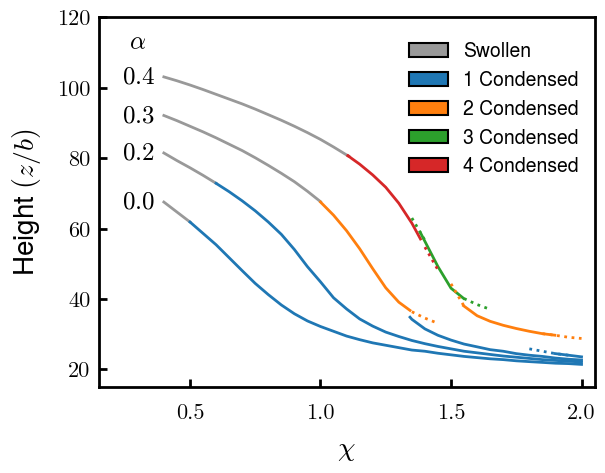

In [7]:
f = plt.figure()
ann_kw = {'textcoords': 'offset points',
          'fontsize': 18,
          'ha': 'left',
          'va': 'center'}

#####a0
plt.annotate(r'$0.0$', xy = (a0s02['Chi']['p0'][0], a0s02['H']['p0'][0]), xytext = (-30, 0), **ann_kw)
onex, oney = a0s02['Chi']['p1'], a0s02['H']['p1']
plt.plot(onex[:2], oney[:2],  color=cdict['p0c'])
plt.plot(onex[1:], oney[1:],  color=cdict['p1c'])

#####a2
plt.annotate(r'$0.2$', xy = (a2s02['Chi']['p1'][0], a2s02['H']['p1'][0]), xytext = (-30, 0), **ann_kw)
onex, oney = a2s02['Chi']['p1'], a2s02['H']['p1']
plt.plot(onex[:5], oney[:5], color=cdict['p0c'])
plt.plot(onex[4:], oney[4:], color=cdict['p1c'])

#####a3
plt.annotate(r'$0.3$', xy = (a3s02['Chi']['p0'][0], a3s02['H']['p0'][0]), xytext = (-30, 0), **ann_kw)
zedx, zedy = a3s02['Chi']['p0'], a3s02['H']['p0']
onex, oney = a3s02['Chi']['p1'], a3s02['H']['p1']
twox, twoy = a3s02['Chi']['p2'], a3s02['H']['p2']
trex, trey = a3s02['Chi']['p3'], a3s02['H']['p3']
plt.plot(twox[8:11],twoy[8:11], ':', color=cdict['p2c']) # meta
plt.plot(zedx[:-8]+zedx[-7:-6]+[1.0], zedy[:-8]+zedy[-7:-6]+[67.66], '-', color=cdict['p0c'])
# plt.plot(twox[:2], twoy[:2], ':', color=cdict['p2c']) # meta
plt.plot([1.0]+twox[2:8]+[1.34297], [67.55]+twoy[2:8]+[36.7624], color=cdict['p2c'])
plt.plot([1.34297]+onex[3:] , [34.8346]+oney[3:] , color=cdict['p1c'])
# plt.plot(onex[2:4], oney[2:4], ':', color=cdict['p1c']) # meta

#####a4
plt.annotate(r'$\alpha$', xy = (a4s02['Chi']['p0'][0], a4s02['H']['p0'][0]), xytext = (-25, 25), **ann_kw)
plt.annotate(r'$0.4$', xy = (a4s02['Chi']['p0'][0], a4s02['H']['p0'][0]), xytext = (-30, 0), **ann_kw)
zedx, zedy = a4s02['Chi']['p0'], a4s02['H']['p0']
onex, oney = a4s02['Chi']['p1'], a4s02['H']['p1']
twox, twoy = a4s02['Chi']['p2'], a4s02['H']['p2']
trex, trey = a4s02['Chi']['p3'], a4s02['H']['p3']
quax, quay = a4s02['Chi']['p4'], a4s02['H']['p4']
plt.plot(zedx[:-3]+[1.108],  zedy[:-3]+[80.57], color=cdict['p0c'])
plt.plot([1.108]+quax[2:8]+[1.383],  [80.57]+quay[2:8]+[57.05],  color=cdict['p4c'])
plt.plot(quax[:3], quay[:3], ':', color=cdict['p4c']) # meta
plt.plot([1.383]+trex[3:5] + [1.5479], [58.82]+trey[3:5]+[40.1922],  color=cdict['p3c'])
plt.plot(trex[1:3], trey[1:3], ':', color=cdict['p3c']) # meta
plt.plot(quax[8:10], quay[8:10], ':', color=cdict['p4c']) # meta
plt.plot(twox[3:5], twoy[3:5], ':', color=cdict['p2c']) # meta
plt.plot([1.5479]+twox[5:11]+[1.8979], [38.0864]+twoy[5:11]+[29.7138], color=cdict['p2c'])
plt.plot(trex[5:8], trey[5:8], ':', color=cdict['p3c']) # meta
plt.plot(twox[10:], twoy[10:], ':', color=cdict['p2c']) # meta
plt.plot([1.8979]+onex[10:]  , [24.5000]+oney[10:]  , color=cdict['p1c'])
plt.plot(onex[7:11], oney[7:11], ':', color=cdict['p1c']) # meta

plt.gca().set_xlim([0.15, 2.05])
plt.gca().set_ylim([15, 120])

plt.gca().set_xlabel(r'$\mathbf{\chi}$')
plt.gca().set_ylabel('Height 'r'$(z/b)$')

conf_new = [
              # Line2D([0], [0], color='k', ls=':', lw=2),          
              Patch(facecolor=cdict['p0c'], edgecolor='k', lw=1.5),
              Patch(facecolor=cdict['p1c'], edgecolor='k', lw=1.5),
              Patch(facecolor=cdict['p2c'], edgecolor='k', lw=1.5),
              Patch(facecolor=cdict['p3c'], edgecolor='k', lw=1.5),
              Patch(facecolor=cdict['p4c'], edgecolor='k', lw=1.5)
            ]
leg = plt.legend(conf_new, 
           ['Swollen', '1 Condensed', '2 Condensed', '3 Condensed', '4 Condensed'],
           # ['Meta', 'd', '1C', '2C', '3C', '4C'],
            loc=(0.61, 0.55), frameon=False, fontsize = 14)

tjy.ticks()
f.savefig('./imgs/full.pdf') 
plt.show()

In [8]:
def build_pXaY(pwd, thresh=1e-05):
    from urllib.error import HTTPError
    full = ['{:03d}'.format(i) for i in np.arange(40,71,10)] + ['{:03d}'.format(i) for i in np.arange(75,201,5)]
    part = []
    
    # Scan through full list of chi vals
    for i in full: 
        # Keep available files
        try: 
            pd.read_csv(GIT+'{:s}/{:s}_x{:s}.dat'.format(pwd, pwd, i))
            part += [i] 
        # Skip files that don't exist
        except HTTPError: 
            pass
    # Print files that were found
    print('{}: '.format(pwd), part)
    
    # Dataframe for chis and comparison of algorithms
    df = pd.DataFrame(
        [   [float(i)/100 for i in part], 
            [tjy.H_find(GIT+'{:s}/{:s}_x{:s}.dat'.format(pwd, pwd, i), 'thresh', thresh=thresh) for i in part],
            # [tjy.H_find(GIT+'{:s}/{:s}_x{:s}.dat'.format(pwd, pwd, i), 'maxpt')  for i in part],
            # [tjy.H_find(GIT+'{:s}/{:s}_x{:s}.dat'.format(pwd, pwd, i), 'norm')   for i in part]
        ],
        # index = ['chi', 'thresh', 'maxpt', 'norm']
        index = ['chi', 'thresh']
    ).transpose()
    return df

In [9]:
p1a0 = build_pXaY('p1a0')
p1a2 = build_pXaY('p1a2')
p1a3 = build_pXaY('p1a3')
p1a4 = build_pXaY('p1a4')

p1a0:  ['040', '050', '060', '070', '075', '080', '085', '090', '095', '100', '105', '110', '115', '120', '125', '130', '135', '140', '145', '150', '155', '160', '165', '170', '175', '180', '185', '190', '195', '200']
p1a2:  ['040', '050', '060', '070', '075', '080', '085', '090', '095', '100', '105', '110', '115', '120', '125', '130', '135', '140', '145', '150', '155', '160', '165', '170', '175', '180', '185', '190', '195', '200']
p1a3:  ['040', '050', '060', '070', '075', '080', '085', '090', '095', '100', '105', '110', '115', '120', '125', '130', '135', '140', '145', '150', '155', '160', '165', '170', '175', '180', '185', '190', '195', '200']
p1a4:  ['040', '050', '060', '070', '075', '080', '085', '090', '095', '100', '105', '110', '145', '150', '155', '160', '165', '170', '175', '180', '185', '190', '195', '200']


In [10]:
p2a3 = build_pXaY('p2a3')
p2a4 = build_pXaY('p2a4')
p3a4 = build_pXaY('p3a4')
p4a4 = build_pXaY('p4a4')

p2a3:  ['095', '100', '105', '110', '115', '120', '125', '130', '135', '140', '145', '150', '155']
p2a4:  ['135', '140', '145', '150', '155', '160', '165', '170', '175', '180', '185', '190']
p3a4:  ['130', '135', '140', '145', '150', '155', '160', '165', '170', '175']
p4a4:  ['110', '115', '120', '125', '130', '135', '140', '145', '150', '155', '160']


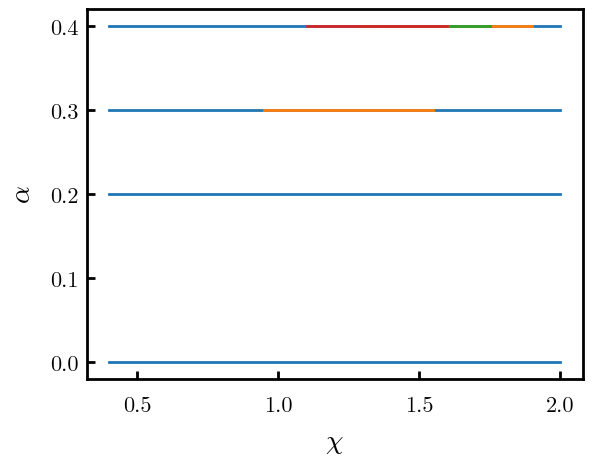

In [12]:
f = plt.subplots(1,1)

cind = ['C0', 'C1', 'C2', 'C3']
for ind,i in enumerate([p1a0]): plt.plot(i.chi, [0.0]*len(i), c=cind[ind])
for ind,i in enumerate([p1a2]): plt.plot(i.chi, [0.2]*len(i), c=cind[ind])
for ind,i in enumerate([p1a3, p2a3]): plt.plot(i.chi, [0.3]*len(i), c=cind[ind])
for ind,i in enumerate([p1a4,p2a4,p3a4,p4a4]): plt.plot(i.chi, [0.4]*len(i), c=cind[ind])
c = ['C1', 'C1', 'C2', 'C3']
plt.ylabel(r'$\alpha$')
plt.xlabel(r'$\mathbf{\chi}$')
tjy.ticks()
plt.show()

# plt.title('Maxpt')
# for ind,i in enumerate([p1a0, p1a2, p1a3, p1a4]): plt.plot(i.chi, i.maxpt, color='C0')
# c = ['C1', 'C1', 'C2', 'C3']
# for ind,i in enumerate([p2a3, p2a4, p3a4, p4a4]): plt.plot(i.chi, i.maxpt, color=c[ind])
# plt.ylabel('Height 'r'$(z/b)$')
# plt.xlabel(r'$\mathbf{\chi}$')
# tjy.ticks()
# plt.show()

# plt.title('Norm')
# for ind,i in enumerate([p1a0, p1a2, p1a3, p1a4]): plt.plot(i.chi, i.norm, '-o', color='C0')
# c = ['C1', 'C1', 'C2', 'C3']
# for ind,i in enumerate([p2a3, p2a4, p3a4, p4a4]): plt.plot(i.chi, i.norm, '-o', color=c[ind])
# plt.ylabel('Height 'r'$(z/b)$')
# plt.xlabel(r'$\mathbf{\chi}$')
# tjy.ticks()
# plt.show()

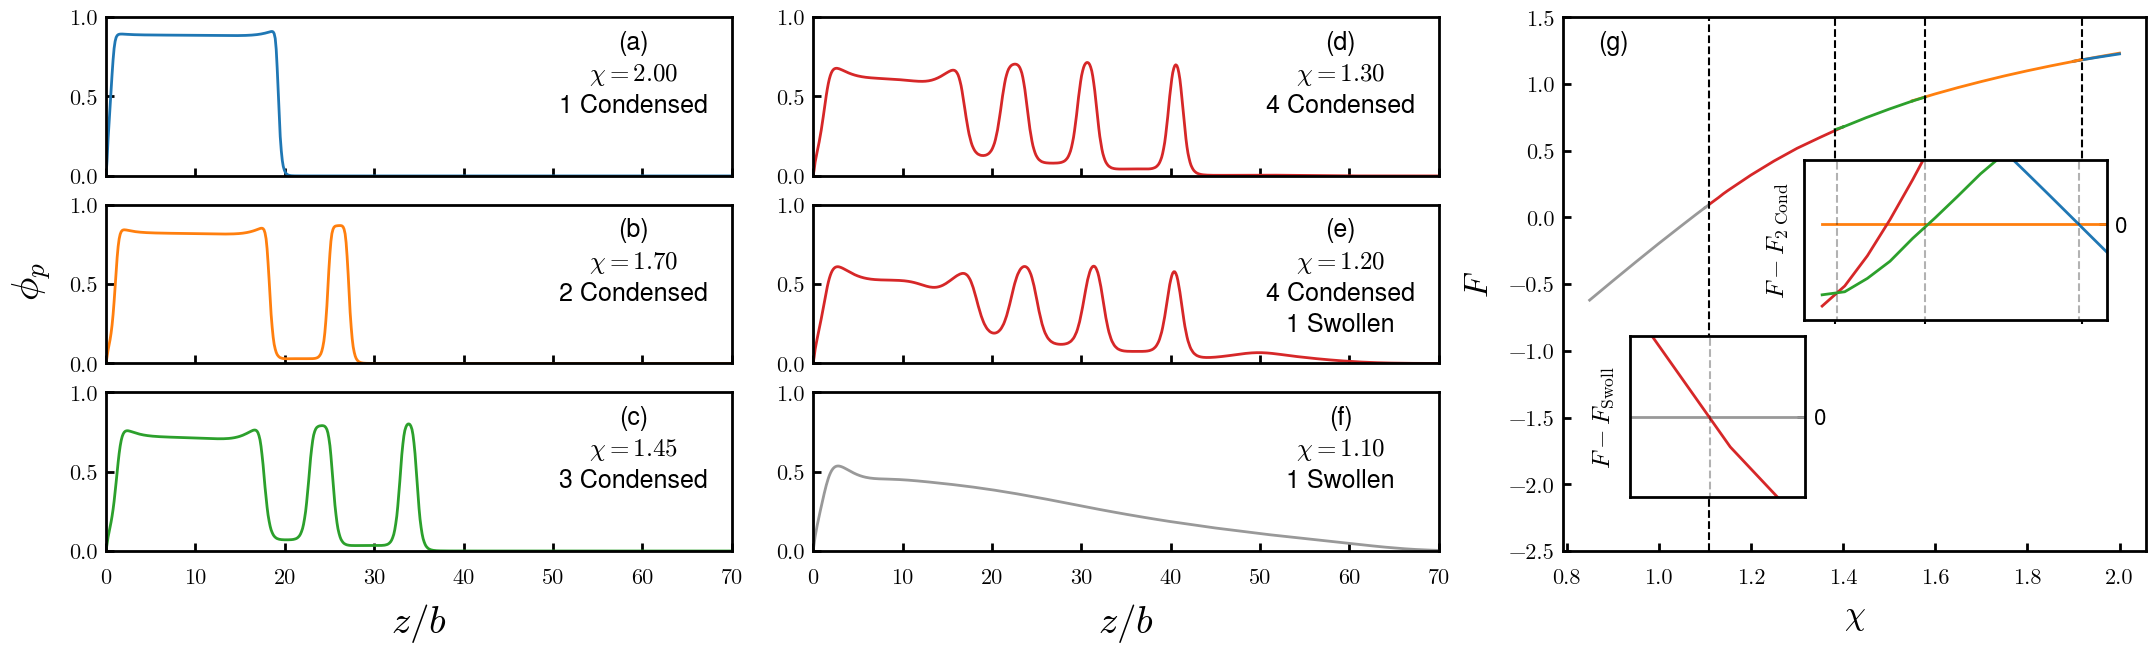

In [256]:
fig = plt.figure(figsize=(24, 6))
gs_right = plt.GridSpec(1, 3, hspace=0, wspace=0.25, top=1.00, left=0.05)
gs_left = plt.GridSpec(3, 3, hspace=0.18, wspace=0.13, top=1.00, left=0.05)

def phread(fname): 
    pha = pd.read_csv(fname, sep="\s+", skiprows=0, header=None)
    return (pha[0], pha[1], pha[8])

ph_axes = np.array([fig.add_subplot(gs_left[i,j]) for i in range(3) for j in range(2)]).reshape([3,2])
ph_axes[0][0].plot(phread(GIT+'p1a4/p1a4_x200.dat')[0], phread(GIT+'p1a4/p1a4_x200.dat')[1], color=cdict['p1c'])
ph_axes[1][0].plot(phread(GIT+'p2a4/p2a4_x170.dat')[0], phread(GIT+'p2a4/p2a4_x170.dat')[1], color=cdict['p2c'])
ph_axes[2][0].plot(phread(GIT+'p3a4/p3a4_x145.dat')[0], phread(GIT+'p3a4/p3a4_x145.dat')[1], color=cdict['p3c'])
ph_axes[0][1].plot(phread(GIT+'p4a4/p4a4_x130.dat')[0], phread(GIT+'p4a4/p4a4_x130.dat')[1], color=cdict['p4c'])
ph_axes[1][1].plot(phread(GIT+'p4a4/p4a4_x120.dat')[0], phread(GIT+'p4a4/p4a4_x120.dat')[1], color=cdict['p4c'])
ph_axes[2][1].plot(phread(GIT+'p1a4/p1a4_x110.dat')[0], phread(GIT+'p1a4/p1a4_x110.dat')[1], color=cdict['p0c'])

fs = {'fontsize': '18', 'horizontalalignment':'center'}
letts = np.array(['a', 'd', 'b', 'e', 'c', 'f'])
for ind, i, lab, chi in zip(letts, ph_axes.flat, [1,4,2,4,3,0], [2.00, 1.30, 1.70, 1.20, 1.45, 1.10]): 
    xtext, ytext = 59, 0.80
    ydelta, ystep = -0.2, 0
    plt.sca(i)
    plt.text(xtext, ytext+ydelta*ystep, r'({:s})'.format(ind), **fs)
    ystep += 1
    plt.text(xtext, ytext+ydelta*ystep, r'$\chi = {:.2f}$'.format(chi), **fs)
    ystep += 1
    if (lab > 0): 
        plt.text(xtext, ytext+ydelta*ystep, '{} Condensed'.format(lab), **fs)
        ystep += 1
    if (chi == 1.20) or (lab == 0): 
        plt.text(xtext, ytext+ydelta*ystep, '1 Swollen', **fs)
    plt.ylim((0, 1.00))
    plt.xlim((0, 70))
    if i!=ph_axes[2][0] and i!=ph_axes[2][1]: 
        plt.setp(i.get_xticklabels(), visible=False)
    else: 
        plt.xlabel('$z/b$', fontsize=28)
    tjy.ticks()

plt.text(0.01, 0.55, r"$\phi_p$", transform=plt.gcf().transFigure, fontsize=28, rotation=90)

## Main FreeE 
fax = fig.add_subplot(gs_right[0,2])
plt.sca(fax)
plt.text(0.06, 0.94, '(g)', transform=plt.gca().transAxes, fontsize=18)
A = F4s02

plt.plot(A['Chi']['p1'][:8], A['F']['p1'][:8], color=cdict['p0c'])
plt.plot(A['Chi']['p4'][2:12], A['F']['p4'][2:12], color=cdict['p4c'])
plt.plot(A['Chi']['p3'][2:6], A['F']['p3'][2:6], color=cdict['p3c'])
plt.plot(A['Chi']['p2'][4:], A['F']['p2'][4:], color=cdict['p2c'])
plt.plot(A['Chi']['p1'][-3:], A['F']['p1'][-3:], color=cdict['p1c'])

plt.gca().set_ylim([-2.5, 1.5])

## Transitions
t14 = 1.108
fax.plot([A['Chi']['p1'][7], t14], [A['F']['p1'][7], A['F']['p1'][7]+0.02], c=cdict['p0c']) # Arb color add
fax.plot([t14]*2, [-2.5,3], '--k', lw=1.5)
t43 = 1.383
fax.plot([A['Chi']['p4'][11], t43], [A['F']['p4'][11], A['F']['p4'][11]-0.02], c=cdict['p3c']) # Arb color add
fax.plot([t43]*2, [-0.8,3], '--k', lw=1.5)
t32 = 1.5779
fax.plot([A['Chi']['p3'][5], t32], [A['F']['p3'][5], A['F']['p3'][5]+0.03], c=cdict['p3c']) # Arb color add
fax.plot([t32]*2, [-0.8,3], '--k', lw=1.5)
t21 = 1.9179
fax.plot([A['Chi']['p2'][11], t21], [A['F']['p2'][11], A['F']['p2'][11]+0.015], c=cdict['p2c']) # Arb color add
fax.plot([t21]*2, [-0.8,3], '--k', lw=1.5)

plt.ylabel('$F$', fontsize=24)
plt.xlabel('$\chi$', fontsize=24)
tjy.ticks()

## Insets
A = F4s02
ins1 = inset_axes(fax, width="100%", height="100%", loc="upper right",
                   bbox_to_anchor=(.132, .12, .3, .3), bbox_transform=fax.transAxes)
plt.sca(ins1) # right inset
Fref = A.iloc[0,:]
plot_Fex(F4s02, Fref, (0,None), -1, "")
plot_Fex(F4s02, Fref, (0,None), 3, "")
plt.plot([t14]*2, [-0.05, 0.05], '--k', alpha=0.3, lw=1.5)
ins1.set_ylabel(r'$F - F_{\mathrm{Swoll}}$', fontsize=18)
ins1.set_xlim((1.100, 1.1175))
ins1.set_ylim((-2e-04, 2e-04))
ins1.yaxis.set_ticks_position('right')
ins1.set_yticks([0])
ins1.set_xticks([])

ins2 = inset_axes(fax, width="100%", height="100%", loc="upper right",
                   bbox_to_anchor=(.43, .45, .52, .30), bbox_transform=fax.transAxes)
plt.sca(ins2) # left inset
Fref = F4s02.iloc[1,:]
plot_Fex(F4s02, Fref, (0,None), 1, "")
plot_Fex(F4s02, Fref, (0,None), 3, "")
plot_Fex(F4s02, Fref, (0,None), 2, "")
plot_Fex(F4s02, Fref, (0,None), 0, "")
plt.plot([t43]*2, [-0.05, 0.05], '--k', alpha=0.3, lw=1.5)
plt.plot([t32]*2, [-0.05, 0.05], '--k', alpha=0.3, lw=1.5)
plt.plot([t21]*2, [-0.05, 0.05], '--k', alpha=0.3, lw=1.5)

ins2.yaxis.set_ticks_position('right')
ins2.set_ylabel(r'$F - F_{\mathrm{2\ Cond}}$', fontsize=18)
ins2.set_xlim((1.310, 1.98))
ins2.set_ylim((-0.015, 0.01))
ins2.set_yticks([0])
ins2.set_xticks([])
plt.show()

# plt.savefig('imgs/xC_pha.eps')

In [137]:
print(letts)

['a' 'd' 'b' 'e' 'c' 'f']


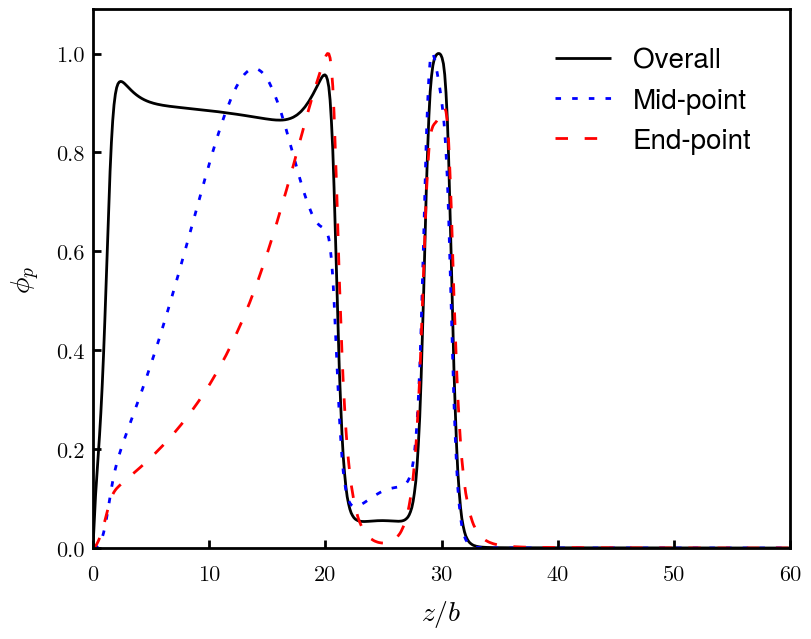

In [40]:
def phread(fname): 
    pha = pd.read_csv(fname, sep="\s+", skiprows=0, header=None)
    return (pha[0], pha[1], pha[6], pha[9])
ph = phread(GIT+'p2a4/p2a4_x145mid.dat')

plt.figure(figsize=(9,7))
plt.plot(ph[0], ph[1]/ph[1].max(), 'k',ls=(0,(1,0)))
plt.plot(ph[0], ph[2]/ph[2].max(), 'b',ls=(0,(2,4)))
plt.plot(ph[0], ph[3]/ph[3].max(), 'r',ls=(0,(4.5,6)))

plt.xlabel(r'$z/b$', fontsize=20)
plt.ylabel(r'$\phi_p$', fontsize=20)
plt.xlim((0, 60))
plt.ylim((0, 1.09))
# plt.text(0.75, 0.81, r'$[s^\prime_1,~s^\prime_2]$', fontsize=20, horizontalalignment='center', transform=plt.gcf().transFigure)
plt.legend([r'Overall', r'Mid-point', r'End-point'], loc='upper right', fontsize=20, bbox_to_anchor=(0.90, 0.88), bbox_transform=plt.gcf().transFigure)

tjy.ticks()

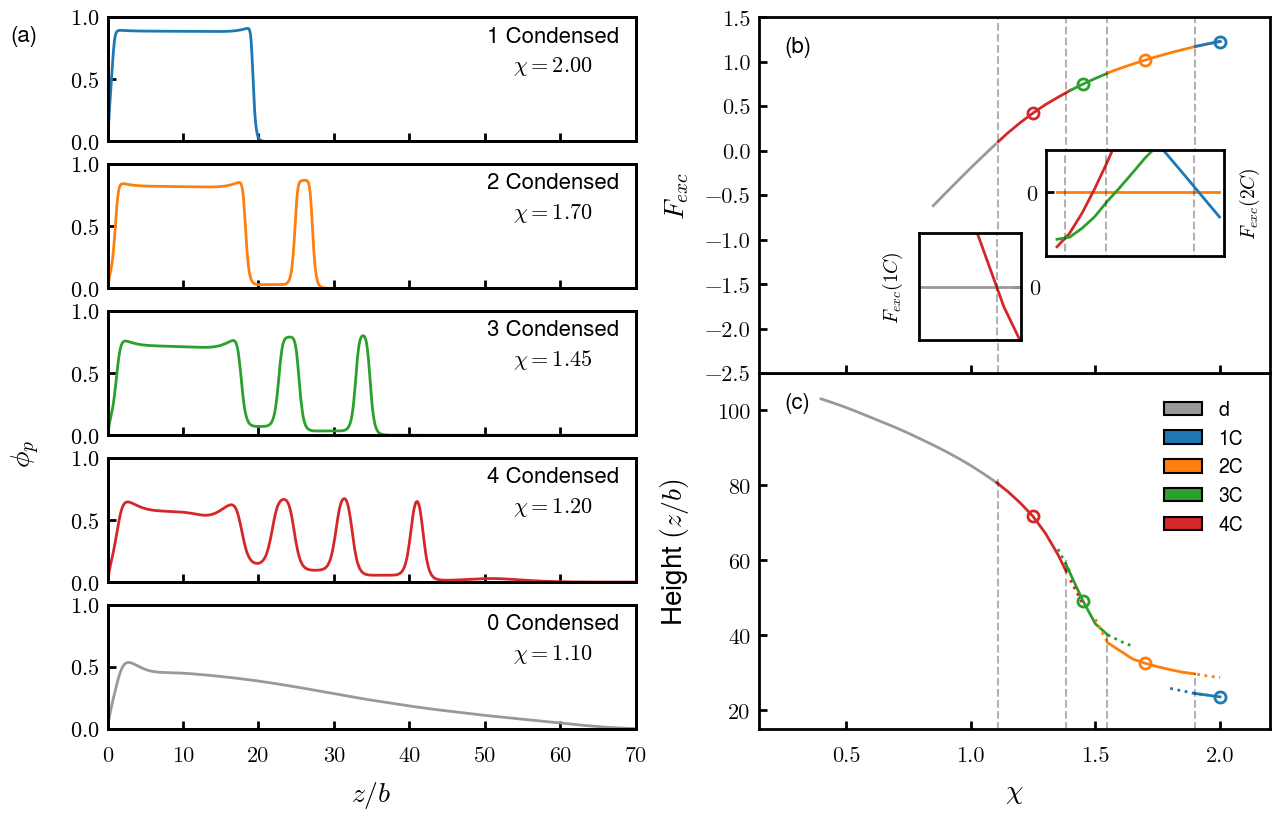

In [123]:
# We'll use two separate gridspecs to have different margins, hspace, etc
gs_left = plt.GridSpec(2, 2, hspace=0, top=1.00, left=0.15)
gs_p = plt.GridSpec(5, 2, hspace=0.18, top=1.00)
fig_files = plt.figure(figsize=(15,8))

# Left axes
hax = fig_files.add_subplot(gs_left[1,1])
hax.set_ylabel(r'Height $(z/b)$')
hax.set_xlabel(r'$\chi$')
fax = fig_files.add_subplot(gs_left[0,1], sharex=hax)

fax.set_ylabel(r'$F_{exc}$')
plt.setp(fax.get_xticklabels(), visible=False)
fig_files.align_ylabels([fax,hax])

# Right four shared axes
ax = fig_files.add_subplot(gs_p[0,0]) # Need to create the first one to share...
other_axes = [fig_files.add_subplot(gs_p[i,0], sharex=ax) for i in range(1,5)]
ph_axes = [ax] + other_axes

# Hide shared x-tick labels
for ax in ph_axes[:-1]:
  plt.setp(ax.get_xticklabels(), visible=False)
ph_axes[-1].set_xlabel(r'${z/b}$')

raxes = [plt.twinx(i) for i in ph_axes]

for ind, ax in enumerate(ph_axes):
  # Right-side y axis
  raxes[ind].set_yticks([])
  # raxes[ind].set_ylabel(" {:d}C".format(ind+1), rotation=0, ha = "left", va = "center")
  
  # Left-side y axis
  ax.set_ylim((-0.10, 1.15))
  ax.yaxis.set_major_formatter(FormatStrFormatter('$%.1f$'))
  ax.set_xlim((0, 100))
    
plt.sca(hax)
plt.text(0.050, 0.9, '(c)', transform=plt.gca().transAxes, fontsize=16)
ann_kw = {'textcoords': 'offset points',
          'fontsize': 20,
          'ha': 'left',
          'va': 'center'}

## Plot heights
zedx, zedy = a4s02['Chi']['p0'], a4s02['H']['p0']
onex, oney = a4s02['Chi']['p1'], a4s02['H']['p1']
twox, twoy = a4s02['Chi']['p2'], a4s02['H']['p2']
trex, trey = a4s02['Chi']['p3'], a4s02['H']['p3']
quax, quay = a4s02['Chi']['p4'], a4s02['H']['p4']

A = a4s02
kw = {'marker': 'o', 'markerfacecolor': 'None', 'markersize': 8, 'markeredgewidth':2}
plt.plot(A['Chi']['p4'][5], A['H']['p4'][5], markeredgecolor = cdict['p4c'], **kw)
plt.plot(A['Chi']['p3'][3], A['H']['p3'][3], markeredgecolor = cdict['p3c'], **kw)
plt.plot(A['Chi']['p2'][7], A['H']['p2'][7], markeredgecolor = cdict['p2c'], **kw)
plt.plot(A['Chi']['p1'][11], A['H']['p1'][11], markeredgecolor = cdict['p1c'], **kw)

plt.plot(zedx[:-3]+[1.108],  zedy[:-3]+[80.57],  color=cdict['p0c'])
plt.plot([1.108]+quax[2:8]+[1.383],  [80.57]+quay[2:8]+[57.05],  color=cdict['p4c'])
plt.plot(quax[:3], quay[:3], ':', color=cdict['p4c']) # meta
plt.plot([1.383]+trex[3:5] + [1.5479], [58.82]+trey[3:5]+[40.1922],  color=cdict['p3c'])
plt.plot(trex[1:3], trey[1:3], ':', color=cdict['p3c']) # meta
plt.plot(quax[8:10], quay[8:10], ':', color=cdict['p4c']) # meta
plt.plot(twox[3:5], twoy[3:5], ':', color=cdict['p2c']) # meta
plt.plot([1.5479]+twox[6:11]+[1.8979], [38.0864]+twoy[6:11]+[29.7138], color=cdict['p2c'])
plt.plot(trex[5:8], trey[5:8], ':', color=cdict['p3c']) # meta
plt.plot(twox[10:], twoy[10:], ':', color=cdict['p2c']) # meta
plt.plot([1.8979]+onex[10:]  , [24.5000]+oney[10:]  , color=cdict['p1c'])
plt.plot(onex[7:11], oney[7:11], ':', color=cdict['p1c']) # meta

plt.gca().set_xlim([0.15, 2.20])
plt.gca().set_ylim([15, 110])

conf_new = [
              Patch(facecolor=cdict['p0c'], edgecolor='k', lw=1.5),
              Patch(facecolor=cdict['p1c'], edgecolor='k', lw=1.5),
              Patch(facecolor=cdict['p2c'], edgecolor='k', lw=1.5),
              Patch(facecolor=cdict['p3c'], edgecolor='k', lw=1.5),
              Patch(facecolor=cdict['p4c'], edgecolor='k', lw=1.5),
            ]
leg = plt.legend(conf_new, 
           ['d', '1C', '2C', '3C','4C'], loc=1)

## Main FreeE 
plt.sca(fax)
plt.text(0.050, 0.9, '(b)', transform=plt.gca().transAxes, fontsize=16)
A = F4s02

# plt.plot(A['Chi']['p1'][:8], A['F']['p1'][:8], color=cdict['p0c'])
# plt.plot(A['Chi']['p1'][8:11], A['F']['p1'][8:11], color=cdict['p0c'], ls='--', marker='x')
# plt.plot(A['Chi']['p4'][2:12], A['F']['p4'][2:12], color=cdict['p4c'])
# plt.plot(A['Chi']['p4'][:2], A['F']['p4'][:2], color=cdict['p4c'], ls='--', marker='x')
# plt.plot(A['Chi']['p3'][2:6], A['F']['p3'][2:6], color=cdict['p3c'])
# plt.plot(A['Chi']['p2'][4:], A['F']['p2'][4:], color=cdict['p2c'])
# plt.plot(A['Chi']['p1'][-3:], A['F']['p1'][-3:], color=cdict['p1c'])

plt.plot(A['Chi']['p1'][:8], A['F']['p1'][:8], color=cdict['p0c'])
plt.plot(A['Chi']['p4'][2:12], A['F']['p4'][2:12], color=cdict['p4c'])
plt.plot(A['Chi']['p3'][2:6], A['F']['p3'][2:6], color=cdict['p3c'])
plt.plot(A['Chi']['p2'][4:], A['F']['p2'][4:], color=cdict['p2c'])
plt.plot(A['Chi']['p1'][-3:], A['F']['p1'][-3:], color=cdict['p1c'])
kw = {'marker': 'o', 'markerfacecolor': 'None', 'markersize': 8, 'markeredgewidth':2}
plt.plot(A['Chi']['p4'][8], A['F']['p4'][8], markeredgecolor = cdict['p4c'], **kw)
plt.plot(A['Chi']['p3'][3], A['F']['p3'][3], markeredgecolor = cdict['p3c'], **kw)
plt.plot(A['Chi']['p2'][7], A['F']['p2'][7], markeredgecolor = cdict['p2c'], **kw)
plt.plot(A['Chi']['p1'][22], A['F']['p1'][22], markeredgecolor = cdict['p1c'], **kw)

plt.gca().set_ylim([-2.5, 1.5])

## Transitions
t14 = 1.108
fax.plot([t14]*2, [-2.5,3], '--k', alpha=0.3, lw=1.5)
hax.plot([t14]*2, [0, 82] , '--k', alpha=0.3, lw=1.5)
t43 = 1.383
fax.plot([t43]*2, [-0.8,3], '--k', alpha=0.3, lw=1.5)
hax.plot([t43]*2, [0, 60] , '--k', alpha=0.3, lw=1.5)
t32 = 1.5479
fax.plot([t32]*2, [-0.8,3], '--k', alpha=0.3, lw=1.5)
hax.plot([t32]*2, [0, 40] , '--k', alpha=0.3, lw=1.5)
t21 = 1.8979
fax.plot([t21]*2, [-0.8,3], '--k', alpha=0.3, lw=1.5)
hax.plot([t21]*2, [0, 30] , '--k', alpha=0.3, lw=1.5)

## Insets
A = F4s02
ins1 = inset_axes(fax, width="100%", height="100%", loc="upper right",
                   bbox_to_anchor=(.332, .12, .20, .3), bbox_transform=fax.transAxes)
plt.sca(ins1) # right inset
Fref = A.iloc[0,:]
plot_Fex(F4s02, Fref, (0,None), -1, "")
plot_Fex(F4s02, Fref, (0,None), 3, "")
plt.plot([t14]*2, [-0.05, 0.05], '--k', alpha=0.3, lw=1.5)
ins1.set_ylabel(r'$F_{exc}(1C)$', fontsize=14)
ins1.set_xlim((1.085, 1.115))
ins1.set_ylim((-2e-04, 2e-04))
ins1.yaxis.set_ticks_position('right')
ins1.set_yticks([0])
ins1.set_xticks([])

ins2 = inset_axes(fax, width="100%", height="100%", loc="upper right",
                   bbox_to_anchor=(.58, .355, .35, .3), bbox_transform=fax.transAxes)
plt.sca(ins2) # left inset
Fref = F4s02.iloc[1,:]
plot_Fex(F4s02, Fref, (0,None), 1, "")
plot_Fex(F4s02, Fref, (0,None), 3, "")
plot_Fex(F4s02, Fref, (0,None), 2, "")
plot_Fex(F4s02, Fref, (0,None), 0, "")
plt.plot([t43]*2, [-0.05, 0.05], '--k', alpha=0.3, lw=1.5)
plt.plot([t32]*2, [-0.05, 0.05], '--k', alpha=0.3, lw=1.5)
plt.plot([t21]*2, [-0.05, 0.05], '--k', alpha=0.3, lw=1.5)

ins2.yaxis.set_label_position('right')
ins2.yaxis.set_ticks_position('left')
ins2.set_ylabel(r'$F_{exc}(2C)$', fontsize=14)
ins2.set_xlim((1.304, 2.02))
ins2.set_ylim((-0.015, 0.01))
ins2.set_yticks([0])
ins2.set_xticks([])

## Phas
def phread(fname): 
    pha = pd.read_csv(fname, sep="\s+", skiprows=0, header=None)
    return (pha[0], pha[1])

plt.text(0.06, 0.45, r"$\phi_p$", transform=fig_files.transFigure, fontsize=20, rotation=90)
ph_axes[0].text(0.06, 0.97, '(a)', transform=fig_files.transFigure, fontsize=16)
ph_axes[0].plot(phread(GIT+'p1a4/p1a4_x200.dat')[0], phread(GIT+'p1a4/p1a4_x200.dat')[1], color=cdict['p1c'])
ph_axes[1].plot(phread(GIT+'p2a4/p2a4_x170.dat')[0], phread(GIT+'p2a4/p2a4_x170.dat')[1], color=cdict['p2c'])
ph_axes[2].plot(phread(GIT+'p3a4/p3a4_x145.dat')[0], phread(GIT+'p3a4/p3a4_x145.dat')[1], color=cdict['p3c'])
ph_axes[3].plot(phread(GIT+'p4a4/p4a4_x125.dat')[0], phread(GIT+'p4a4/p4a4_x125.dat')[1], color=cdict['p4c'])
ph_axes[4].plot(phread(GIT+'p1a4/p1a4_x110.dat')[0], phread(GIT+'p1a4/p1a4_x110.dat')[1], color=cdict['p0c'])

fs = {'fontsize': '16', 'horizontalalignment':'center'}
for i, lab, chi in zip(ph_axes, [1,2,3,4, 0], [2.00, 1.70, 1.45, 1.20, 1.10]): 
    plt.sca(i)
    plt.text(59, 0.80, '{} Condensed'.format(lab), **fs)
    plt.text(59, 0.56, r'$\chi = {:.2f}$'.format(chi), **fs)
    plt.ylim((0, 1.00))
    plt.xlim((0, 70))
    if i!=ph_axes[-1]: plt.setp(i.get_xticklabels(), visible=False)
    
for i in ph_axes: 
    i.set_xlim((0, 70))
    
# plt.savefig('imgs/hfpha.eps')
tjy.ticks(ph_axes)
tjy.ticks([fax, hax])
tjy.ticks([ins1, ins2])

In [124]:
#@title rf_sig2 
## https://apps.automeris.io/wpd/
## https://neutrons.ornl.gov/sites/default/files/beamline_04A_xray_neutron_reflectivity_tutorial.pdf
rf_sig2 = np.array([
  [0.06179395874263249, 0.19395188786606904],
  [0.07266822200392908, 0.04919792368808944],
  [0.08354248526522579, 0.020824052033127552],
  [0.09441674852652249, 0.010391025153434505],
  [0.10529101178781908, 0.006001842711413216],
  [0.11616527504911578, 0.003695783620005037],
  [0.12703953831041248, 0.0024261864651276594],
  [0.14063236738703322, 0.0014938771941300196],
  [0.15422519646365418, 0.0009842142715090125],
  [0.169177308447937, 0.0006535671129188992],
  [0.18548870333988188, 0.0004199331722248838],
  [0.20180009823182699, 0.00027986812561200844],
  [0.21947077603143395, 0.00018683895911461042],
  [0.24121930255402735, 0.00012290476488312772],
  [0.2656863948919449, 0.0000826454937096948],
  [0.2915127701375245, 0.00005524526532387196],
  [0.3200577111984281, 0.00003655879738404468],
  [0.3499619351669939, 0.000024964237407292996],
  [0.37986615913555977, 0.000017419282898910702],
  [0.4097703831041256, 0.000012256093729734932],
  [0.43967460707269146, 0.000008826355320523336],
  [0.4695788310412573, 0.000006441492009952339],
  [0.49948305500982315, 0.000004795734556172083],
  [0.529387278978389, 0.000003594278024743796],
  [0.5592915029469546, 0.0000027298823518432153],
  [0.5891957269155205, 0.0000020906725976956734],
  [0.6190999508840863, 0.0000016037995588355252],
  [0.6490041748526522, 0.0000012405777426693335],
  [0.678908398821218, 9.676264104525616e-7],
  [0.7088126227897839, 7.610291195698061e-7],
  [0.7387168467583497, 5.975480992412336e-7],
  [0.7686210707269155, 4.6840605157686074e-7],
  [0.7985252946954814, 3.727089523036148e-7],
  [0.828429518664047, 2.950877981719466e-7],
  [0.8583337426326129, 2.35974176246622e-7],
  [0.8882379666011787, 1.8682969556720036e-7],
  [0.9181421905697446, 1.4990049469754196e-7],
  [0.9480464145383104, 1.1967248971490916e-7],
  [0.9779506385068762, 9.538138405038828e-8],
  [1.0078548624754422, 7.66553986564397e-8],
  [1.0377590864440078, 6.119754591747514e-8],
  [1.0676633104125735, 4.901953647170128e-8],
  [1.0975675343811395, 3.9395655112396656e-8],
  [1.1274717583497056, 3.150369930723753e-8],
  [1.1573759823182712, 2.5234618709500613e-8],
  [1.1872802062868368, 2.0246684107545488e-8],
  [1.217184430255403, 1.616386323814433e-8],
  [1.2470886542239685, 1.2925828638843291e-8],
  [1.2769928781925346, 1.030214570205794e-8],
  [1.3068971021611002, 8.238362821763427e-9],
  [1.3368013261296663, 6.577065619726354e-9],
  [1.366705550098232, 5.242053735943706e-9],
  [1.396609774066798, 4.178022382520287e-9],
  [1.4265139980353636, 3.313402199886461e-9],
  [1.4564182220039292, 2.6364618013000628e-9],
  [1.4863224459724953, 2.0908596298793993e-9],
  [1.516226669941061, 1.6554127843033817e-9],
  [1.546130893909627, 1.308476013369937e-9],
  [1.5760351178781926, 1.0325313815761018e-9],
  [1.6059393418467587, 8.147807396130235e-10],
  [1.6358435658153243, 6.408174293425113e-10],
  [1.6657477897838904, 5.082035675520373e-10]
 ])

In [125]:
rho_e_w = 3.33e23 # electron density of water, e/cm3 (Source: Brasla, 1985)
rho_e_w *= 1e2**3 / 1e10**3 # e/AA3
r_e = 2.818e-15 # m
r_e *= 1e10 # AA

def RQZ_pha(phname, qz):
    phname = GIT + phname
    ph = pd.read_csv(phname, sep="\s+", skiprows=0, header=None)
    pha = ph[2]
    pha.update(pd.Series([2.32], index=[0])) # electron density of SiO2 substrate, assuming polymer electron density 1.0: (CH2)x = 0.95 (Source: Russel, 1990)
    phb = ph[10]
    phe = pha*1.0 + phb*rho_e_w # electron density profile, rho_e_protein = 1.0
    z = ph[0]*10 # nm to AA
    dz = z[1] - z[0]
    dpdz = np.gradient(phe, dz)
    return [RQZ(z, dpdz, i) for i in qz]

def RQZ(z, dpdz, qzi): return np.power(np.absolute(np.trapz(dpdz*np.exp(1j*qzi*z), x=z)/rho_e_w), 2) # j is imaginary

def Z_PHA(phname):
    phname = 'https://github.com/tyokokur/tmpdat/raw/main/sysg/{}'.format(phname)
    ph = pd.read_csv(phname, sep="\s+", skiprows=0, header=None)
    ph.iloc[0,1] = 10 # Artificial substrate with 5x electron density as polymer and solvent
    return ph.iloc[:,0:2] 

# qz_test = [0, 0.1]
# RQZ_pha('p1a3_x150.dat', qz_test)

p1a3: [130.00918162769773, 128.34423056680433, 127.35093913619235, 130.1089981592482, 126.823502498428]
p2a3: [160.49122824795296, 168.7176656853569, 194.29820625536848, 172.661387248789, 160.551849611424, 161.98808454587873, 190.08448533005023]
p3a3: [127.36733633901383, 245.53209096412792, 166.91099735050665, 153.64620525988522, 150.48210071916387, 227.8275170832606, 144.253012785053]
[0.09334698123873995, 0.12773298042650105, 0.19315048592620923, 0.2665755327611195]


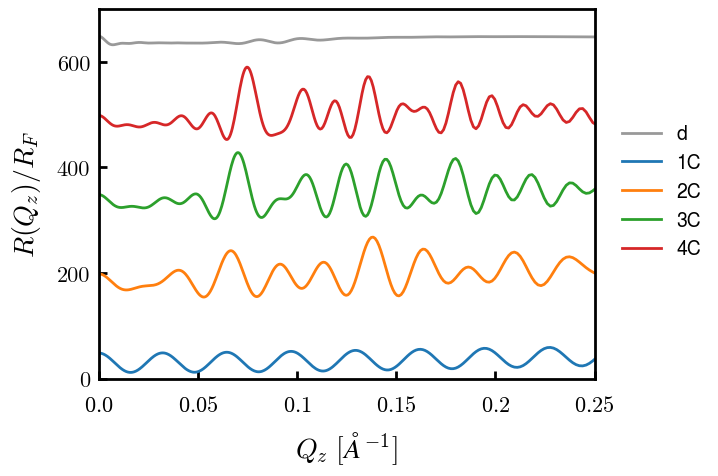

In [174]:
step = 0
delta = 150
def RQZ_plot2(row, qz, filename, xc, light_frac):
  axs[row,0].plot(qz, RQZ_pha(filename, qz), color=tjy.lighten_color(cdict['p'+xc+'c'], light_frac), alpha=1.0)
  axs[row,1].plot(Z_PHA(filename)[0]*10, Z_PHA(filename)[1], color=tjy.lighten_color(cdict['p'+xc+'c'], light_frac), alpha=1.0)
  return
def RQZ_plot3(row, qz, filename, xc, light_frac):
  global step, delta
  if row == -1: 
    laxs.plot(qz, step*delta + np.array(RQZ_pha(filename, qz)), color=tjy.lighten_color(cdict['p'+xc+'c'], light_frac), alpha=1.0)
    step += 1
  else: laxs[row].plot(qz, RQZ_pha(filename, qz), color=tjy.lighten_color(cdict['p'+xc+'c'], light_frac), alpha=1.0)
  return

# df_rf = pd.DataFrame(rf_sig2, columns=["x", "y"])
# qz = df_rf.x
qz = np.logspace(-3,0,1000) # 0.001 to 1

light_arr = np.linspace(1.0,1.0, 1)
# f, axs = plt.subplots(4, 2, figsize=(12,7))
f, laxs = plt.subplots(1,1)
for ind,i in enumerate(['200']):
  RQZ_plot3(-1, qz, './p1a4/p1a4_x'+i+'.dat', '1', light_arr[ind])
  dists = [0.05911661987885619, 0.08328101053386586, 0.10775887478779947, 0.13242765756159663, 0.1565735098703248, 0.1813448857722696]
  d1 = [np.pi/(dists[i]-dists[i-1]) for i in range(1,len(dists))]
  print('p1a3: {}'.format(d1))
for ind,i in enumerate(['170']):
  RQZ_plot3(-1, qz, './p2a4/p2a4_x'+i+'.dat', '2', light_arr[ind])
  dists = [0.0585104329773615, 0.07808528879899027, 0.09670570202500406, 0.11287462460095805, 0.13106973297839192, 0.15063719770205122, 0.17003117141559324, 0.18655852054740132]
  d2 = [np.pi/(dists[i]-dists[i-1]) for i in range(1,len(dists))]
  print('p2a3: {}'.format(d2))
for ind,i in enumerate(['145']):
  RQZ_plot3(-1, qz, './p3a4/p3a4_x'+i+'.dat', '3', light_arr[ind])
  dists = [0.05776143296570569, 0.08242703989359033, 0.0952220787875033, 0.11404404201016963, 0.1344909684297056, 0.15536782114890552, 0.16915716799256042, 0.1909355183572144]
  d3 = [np.pi/(dists[i]-dists[i-1]) for i in range(1,len(dists))]
  print('p3a3: {}'.format(d3))
for ind,i in enumerate(['130']):
  RQZ_plot3(-1, qz, './p4a4/p4a4_x'+i+'.dat', '4', light_arr[ind])
for ind,i in enumerate(['110']):
  RQZ_plot3(-1, qz, './p4a4/p4a4_x'+i+'.dat', '0', light_arr[ind])

## Formatting
laxs.set_xlim([0.0, 0.25])
ticklabs = [0.0, 0.05, 0.10, 0.15, 0.20, 0.25]
laxs.set_xticks(ticklabs)
laxs.set_xticklabels(['${}$'.format(i) for i in ticklabs])
laxs.set_xticklabels([], minor=True)
# i.set_yscale('log')
laxs.set_ylim([0.0, 700])
ticklabs = [0, 200, 400, 600]
laxs.set_yticks(ticklabs)

plt.ylabel(r'$R(Q_z)/R_F$', fontsize=20)
plt.xlabel(r'$Q_z$' ' ' r'$[\AA^{-1}]$')


conf_new = [
              Line2D([0], [0], color=cdict['p0c'], ls='-', lw=2),  
              Line2D([0], [0], color=cdict['p1c'], ls='-', lw=2),  
              Line2D([0], [0], color=cdict['p2c'], ls='-', lw=2),  
              Line2D([0], [0], color=cdict['p3c'], ls='-', lw=2),  
              Line2D([0], [0], color=cdict['p4c'], ls='-', lw=2),  
           ]
# raxs[-1].set_xlabel(r'$\bm{z}\ [\AA]$')
plt.legend(conf_new, ['d', '1C', '2C', '3C', '4C'], loc = 'center left', frameon=False, bbox_to_anchor=(0.9, 0.50, 0,0), bbox_transform=plt.gcf().transFigure)

# d = 2pi / dQ --> dQ = 2pi / d
print([2*np.pi / H for H in (67.31, 49.19, 32.53, 23.57)])
# [1.30: 67.31, 1.45: 49.19, 1.70: 32.53, 2.00: 23.57]

# plt.savefig('imgs/refs.png')
tjy.ticks()

In [127]:
f = plt.figure(figsize=(20,10))

ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(2,4,3)
ax3 = plt.subplot(2,4,4)
ax4 = plt.subplot(2,4,7)
ax5 = plt.subplot(2,4,8)
axs = [ax1, ax2, ax3, ax4, ax5]

plt.sca(axs[0])
plt.annotate(r'$\bm{\alpha = 0.0}$', xy = (a0s02['Chi']['p0'][0], a0s02['H']['p0'][0]), 
             xytext = (10, 5), textcoords = 'offset points', 
             fontsize = 20, horizontalalignment = 'center', verticalalignment = 'bottom')
#plot_H(a0s02,-1, "")
plot_H(a0s02, 0, "")
#plot_H(a1s02, 0, "")
#plt.annotate(r'$\alpha = 0.1$', xy = (a1s02.iloc[0,1][0], a1s02.iloc[0,0][0]), 
#             xytext = (10, 5), textcoords = 'offset points', 
#             fontsize = 20, horizontalalignment = 'center', verticalalignment = 'bottom')
plt.annotate(r'$\alpha = 0.2$', xy = (a2s02['Chi']['p1'][0], a2s02['H']['p1'][0]), 
             xytext = (10, 5), textcoords = 'offset points', 
             fontsize = 20, horizontalalignment = 'center', verticalalignment = 'bottom')
plot_H(a2s02, 0, "")
plt.annotate(r'$\alpha = 0.3$', xy = (a3s02['Chi']['p0'][0], a3s02['H']['p0'][0]), 
             xytext = (10, 5), textcoords = 'offset points', 
             fontsize = 20, horizontalalignment = 'center', verticalalignment = 'bottom')
plot_H(a3s02,-1, "")
plot_H(a3s02, 0, "")
plot_H(a3s02, 1, "")
#plot_H(a3s02, 2, "")
plt.annotate(r'$\alpha = 0.4$', xy = (a4s02['Chi']['p0'][0], a4s02['H']['p0'][0]), 
             xytext = (10, 5), textcoords = 'offset points', 
             fontsize = 20, horizontalalignment = 'center', verticalalignment = 'bottom')
plot_H(a4s02,-1, "")
plot_H(a4s02, 0, "")
plot_H(a4s02, 1, "")
plot_H(a4s02, 2, "")
plot_H(a4s02, 3, "")
axs[0].set_xlim([0.25, 2.05])
axs[0].set_ylim([19, 111])

### a0
#plt.sca(axs[1])
#plot_F(F0s02,-1, "")
#plot_F(F0s02, 0, "")

### a2
#plt.sca(axs[2])
#plot_F(F2s02,-1, "")
#plot_F(F2s02, 0, "")


### a4
plt.sca(axs[2])
Fref = F4s02.iloc[0,:] #p1
plot_Fex(F4s02, Fref, (7,11), 0, " a4")
plot_Fex(F4s02, Fref, (7,11), 3, " a4")
#plot_F(F4s02,0,"")
#plot_F(F4s02,3,"")

plt.sca(axs[1])
Fref = F4s02.iloc[1,:] #p2
plot_Fex(F4s02, Fref, (0,None), 3, " a4")
plot_Fex(F4s02, Fref, (0,None), 2, " a4")
plot_Fex(F4s02, Fref, (0,None), 1, " a4")
plot_Fex(F4s02, Fref, (0,None), 0, " a4")

### a3
plt.sca(axs[3])
Fref = F3s02.iloc[1,:] #p2
plot_Fex(F3s02, Fref, (4,15), 0, " a3")
plot_Fex(F3s02, Fref, (4,15), 1, " a3")
plot_Fex(F3s02, Fref, (4,15), 2, " a3")

plt.sca(axs[4])
Fref = F3s02.iloc[1,:] #p2
plot_Fex(F3s02, Fref, (0,6), 0, " a3")
plot_Fex(F3s02, Fref, (0,6), 1, " a3")
plot_Fex(F3s02, Fref, (0,6), 2, " a3")


conf_new = [
              #Patch(facecolor=cdict['p0c'], edgecolor='k', lw=1.5),
              Patch(facecolor=cdict['p1c'], edgecolor='k', lw=1.5),
              Patch(facecolor=cdict['p2c'], edgecolor='k', lw=1.5),
              Patch(facecolor=cdict['p3c'], edgecolor='k', lw=1.5),
              Patch(facecolor=cdict['p4c'], edgecolor='k', lw=1.5),
            ]
leg = axs[0].legend(conf_new, 
           ['1C', '2C', '3C', '4C'],
            loc=1)

#f.suptitle(r"$\sigma = 0.02\ \mathrm{c/nm}^2$", fontweight='bold', size=28)
ylabs = [r'Height $\bm{(z/b)}$', r'Free Diff', '', 'Free Diff', '']
locs = [1, 2, 2, 2, 2]
tits = ['Peaks and Charges', r'$F(\alpha = 0.4)$',  r'$F(\alpha = 0.40)$',
        r'$F^{(1C)}(\alpha = 0.30)$',r'$F^{(2C)}(\alpha = 0.30)$']
for i, ax in enumerate(axs):
  ax.set_xlabel(r'$\bm{\chi}$')
  ax.set_ylabel(ylabs[i])
  ax.set_title(tits[i])
  if i!=0: ax.yaxis.set_major_formatter(FormatStrFormatter('%.0e'))
  #if i!=0: leg = ax.legend(loc = locs[i])
  leg.get_frame().set_linewidth(2.0)
plt.subplots_adjust(hspace=0.40)
plt.subplots_adjust(wspace=0.40)

plt.show()

ValueError: 
\bm{(z/b)}
^
Unknown symbol: \bm, found '\'  (at char 0), (line:1, col:1)

<Figure size 2000x1000 with 5 Axes>

In [31]:
#@title
# def Gibbs(phAr, b0):
#   dx = (phAr.iloc[1,0] - phAr.iloc[0, 0]) * b0 #Assuming equally spaced
#   maxpt = np.argmax(phAr.iloc[:,1])

#   sum = 0
#   for i in range(maxpt, np.max(phAr.index)):
#     sum += phAr.iloc[i, 1]
#   sum *= dx 

#   rGibbs =  sum / phAr.iloc[maxpt, 1] + phAr.iloc[maxpt, 0] *b0

#   return rGibbs

In [ ]:
# def Gibbsf(filename, b0):
#   df = pd.read_csv(filename, sep="\s+", skiprows=0)
#   Nx = len(df.index)
#   rows = range(0, Nx)

#   phA = pd.DataFrame(data=None, index=rows, columns=range(2), dtype=None, copy=False)
#   phA = phA.fillna(0) # with 0s rather than NaNs

#   for i in range(Nx):
#     phA.iloc[i, 0] = df.iloc[i,0] * b0
#     phA.iloc[i, 1] = df.iloc[i,1] 

#   dx = (phA.iloc[1,0] - phA.iloc[0, 0]) #Assuming equally spaced
#   maxpt = np.argmax(phA.iloc[:,1])

#   sum = 0
#   for i in range(maxpt, np.max(phA.index)):
#     sum += phA.iloc[i, 1]
#   sum *= dx 

#   rGibbs =  sum / phA.iloc[maxpt, 1] + phA.iloc[maxpt, 0]

#   return rGibbs

In [ ]:
# read_list =  ['0100', '0200', '0300', '0400', '0500', '0600', '0800', '10', '15', '20', '30', '40', '50', '75', '100']
# tack = [0]*len(read_list) #see add for options
# tack[8:9] = [1]*2
# tack[10:] = [2]*6
# add = ['_1C', '_1C', '_']
# read_list = ['phfinal'+add[tack[ind]]+i+'.dat' for ind, i in enumerate(read_list)]
# print("Files:\n", read_list)

# LH = np.zeros(len(read_list))
# print("[", end="")
# for i in range(len(read_list)): 
#   print(tjy.H_find(read_list[i], 0.6), end="")
#   if i!=(len(read_list)-1): print(", ", end="")
# print("]")

In [ ]:
# read_list = ['0506_01','0506_02','0506_03','d_04','0506_045','0506_05','d_06','d_08', '0506_15','0506_30','0506_50']  #['01','02','03','04','05','10','20','30','40','50']  #['000', '010', '020', '030', '040', '050','060','070','080','090', '100'] #['01','02','03','04','045','05','06','15','30','50'] 
# read_list = ['ph'+i+'.dat' for i in read_list]

# print("[", end="")
# for i in range(len(read_list)): 
#   print(Gibbsf(read_list[i], 0.6), end="")
#   if i!=(len(read_list)-1): print(", ", end="")
# print("]")

In [155]:
def RQZ_plot(row, qz, filename, xc, light_frac):
  # axs[row,0].plot(qz, np.power(qz, 4)*np.multiply(RQZ_pha(filename, qz), df_rf.y), color=tjy.lighten_color(cdict['p'+xc+'c'], light_frac), alpha=0.7)
  axs[row,0].plot(qz, RQZ_pha(filename, qz), color=tjy.lighten_color(cdict['p'+xc+'c'], light_frac), alpha=0.7)
  axs[row,1].plot(Z_PHA(filename)[0]*10, Z_PHA(filename)[1], color=tjy.lighten_color(cdict['p'+xc+'c'], light_frac), alpha=0.7)
  return

NameError: name 'RQZ_plot' is not defined

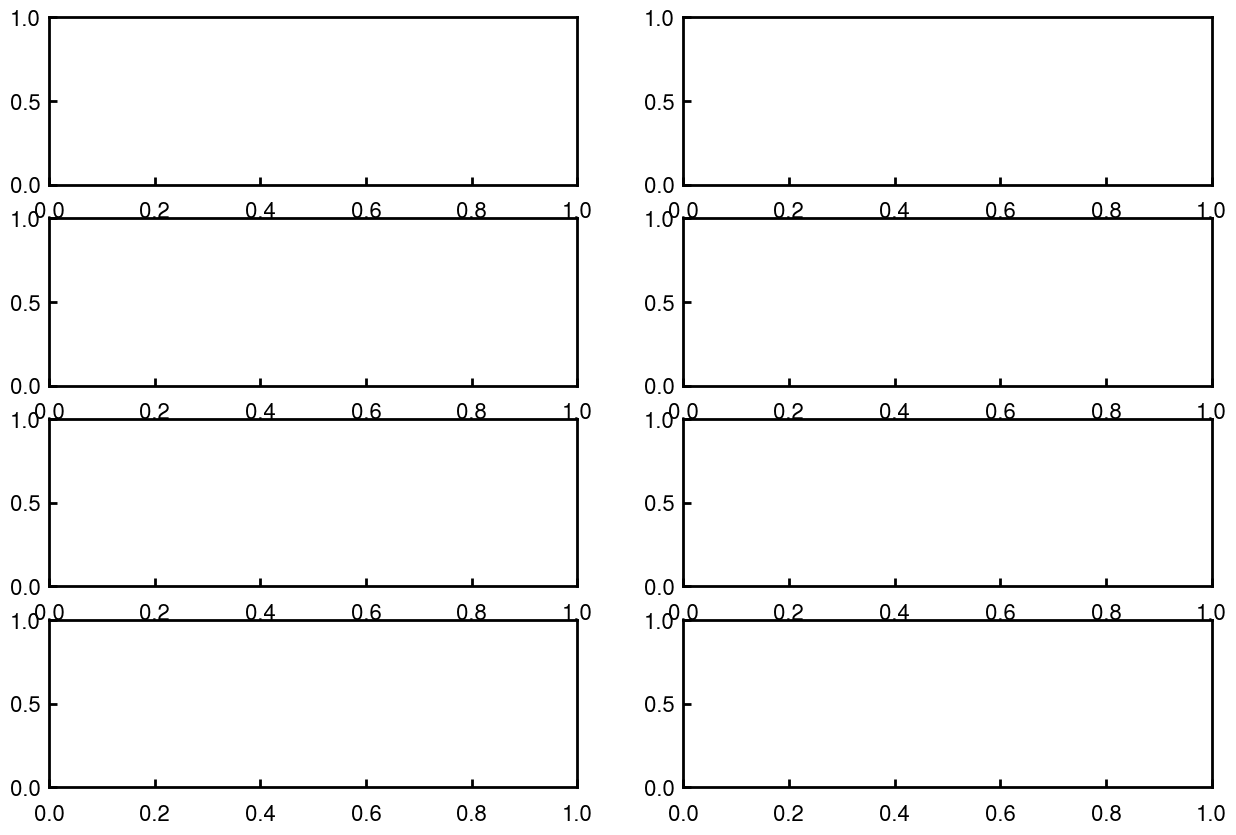

In [128]:
# df_rf = pd.DataFrame(rf_sig2, columns=["x", "y"])
# qz = df_rf.x # AA units
qz = np.logspace(-3,0,1000) # 0.001 to 1

light_arr = np.linspace(0.6, 1.0, 5)
f, axs = plt.subplots(4, 2, figsize=(15,10))
for ind,i in enumerate(['165', '160', '155', '150', '145']):
  RQZ_plot(0, qz, 'p1a4_x'+i+'.dat', '1', light_arr[ind])
for ind,i in enumerate(['155', '150', '145', '140', '135']):
  RQZ_plot(1, qz, 'p2a4_x'+i+'.dat', '2', light_arr[ind])
for ind,i in enumerate(['150', '145', '140', '135', '130']):
  RQZ_plot(2, qz, 'p3a4_x'+i+'.dat', '3', light_arr[ind])
for ind,i in enumerate(['140', '135', '130', '125', '120']):
  RQZ_plot(3, qz, 'p4a4_x'+i+'.dat', '4', light_arr[ind])


## Formatting
laxs = axs[:,0]
raxs = axs[:,1]

for i in laxs:
  i.set_xscale('log')
  i.set_xlim([0.05, 0.20])
  i.set_xticks([0.05, 0.10, 0.15, 0.20])
  i.set_yscale('log')
  i.set_ylim([.1, 300])
  # i.set_yticklabels([])
  if i != laxs[-1]: 
    i.spines['bottom'].set_color('none')
    plt.setp(i.get_xticklabels(), visible=False)
  if i != laxs[0]: 
    i.spines['top'].set_color('none')

for i in raxs:
  if i != raxs[-1]: 
    plt.setp(i.get_xticklabels(), visible=False)
    i.spines['bottom'].set_color('none')
  if i!= raxs[0]:
    i.spines['top'].set_color('none')
  i.set_xlim([-1, 650])
  i.set_ylim([0, 1])
  i.tick_params(axis='y',which='both', left=False, labelleft=False)

  
plt.gcf().text(0.51, 0.45, r'$\langle\phi_p\rangle_{xy}$', 
               rotation=90, fontsize=20, fontweight='bold')
plt.gcf().text(0.050, 0.42, r'$R(Q_z)/R_F$', 
               rotation=90, fontsize=20, fontweight='bold')

plt.subplots_adjust(hspace=0)
laxs[-1].set_xlabel(r'$Q_z\ [\AA^{-1}]$')
raxs[-1].set_xlabel('z 'r'$[\AA]$')
# plt.legend(frameon=False)
plt.show()

HTTPError: HTTP Error 404: Not Found

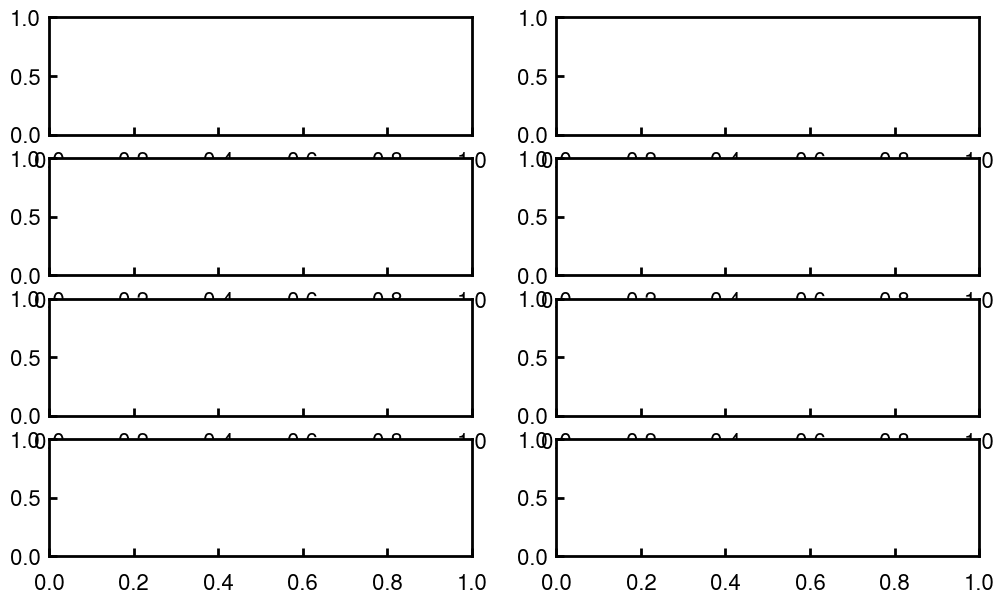

In [129]:
def RQZ_plot2(row, qz, filename, xc, light_frac):
  axs[row,0].plot(qz, RQZ_pha(filename, qz), color=tjy.lighten_color(cdict['p'+xc+'c'], light_frac), alpha=1.0)
  axs[row,1].plot(Z_PHA(filename)[0]*10, Z_PHA(filename)[1], color=tjy.lighten_color(cdict['p'+xc+'c'], light_frac), alpha=1.0)
  return

# df_rf = pd.DataFrame(rf_sig2, columns=["x", "y"])
# qz = df_rf.x
qz = np.logspace(-3,0,1000) # 0.001 to 1

light_arr = np.linspace(1.0,1.0, 1)
f, axs = plt.subplots(4, 2, figsize=(12,7))
# f2, ax2 = plt.subplots(1,1)
for ind,i in enumerate(['125']):
  RQZ_plot2(0, qz, 'p1a3_x'+i+'.dat', '1', light_arr[ind])
  dists = [0.05911661987885619, 0.08328101053386586, 0.10775887478779947, 0.13242765756159663, 0.1565735098703248, 0.1813448857722696]
  d1 = [np.pi/(dists[i]-dists[i-1]) for i in range(1,len(dists))]
  print('p1a3: {}'.format(d1))
for ind,i in enumerate(['110']):
  RQZ_plot2(1, qz, 'p2a3_x'+i+'.dat', '2', light_arr[ind])
  dists = [0.0585104329773615, 0.07808528879899027, 0.09670570202500406, 0.11287462460095805, 0.13106973297839192, 0.15063719770205122, 0.17003117141559324, 0.18655852054740132]
  d2 = [np.pi/(dists[i]-dists[i-1]) for i in range(1,len(dists))]
  print('p2a3: {}'.format(d2))
for ind,i in enumerate(['145']):
  RQZ_plot2(2, qz, 'p3a4_x'+i+'.dat', '3', light_arr[ind])
  dists = [0.05776143296570569, 0.08242703989359033, 0.0952220787875033, 0.11404404201016963, 0.1344909684297056, 0.15536782114890552, 0.16915716799256042, 0.1909355183572144]
  d3 = [np.pi/(dists[i]-dists[i-1]) for i in range(1,len(dists))]
  print('p3a3: {}'.format(d3))
for ind,i in enumerate(['160']):
  RQZ_plot2(3, qz, 'p4a4_x'+i+'.dat', '4', light_arr[ind])


## Formatting
laxs = axs[:,0]
raxs = axs[:,1]

for i in laxs:
  i.set_xscale('log')
  i.set_xlim([0.05, 0.20])
  ticklabs = [0.05, 0.10, 0.15, 0.20]
  i.set_xticks(ticklabs)
  i.set_xticklabels(['${}$'.format(i) for i in ticklabs])
  i.set_xticklabels([], minor=True)
  i.set_yscale('log')
  i.set_ylim([0.1, 300])
  i.tick_params(axis='y',which='both', labelleft=False)
  if i != laxs[-1]: 
    i.tick_params(axis='x', which='both', length=0.0)
    i.tick_params(axis='x', which='both', labelbottom=False)
    i.spines['bottom'].set_color('none')
  if i!= laxs[0]: 
    i.spines['top'].set_color('none')

for i in raxs:
  if i != raxs[-1]: 
    i.tick_params(axis='x', which='both', length=0.0)
    i.tick_params(axis='x', which='both', labelbottom=False)
    i.spines['bottom'].set_color('none')
  if i!= raxs[0]:
    i.spines['top'].set_color('none')
  i.set_xlim([-1, 500])
  i.set_ylim([-0.15, 1])
  i.tick_params(axis='y',which='both', left=False, labelleft=False)

  
plt.gcf().text(0.51, 0.45, r'$\bm{\langle\phi_p\rangle_{xy}}$', 
               rotation=90, fontsize=20)
plt.gcf().text(0.075, 0.40, r'$R(Q_z)/R_F$', 
               rotation=90, fontsize=20)

plt.subplots_adjust(hspace=0)
laxs[-1].set_xlabel(r'$Q_z$' ' ' r'$[\AA^{-1}]$')
raxs[-1].set_xlabel(r'$\bm{z}\ [\AA]$')
# plt.legend(frameon=False)

plt.savefig('imgs/refs.png')
plt.show()